In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import yfinance as yf
from datetime import datetime
yf.pdr_override()

In [44]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [45]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [46]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [48]:
# tinker
company_list = [AAPL, GOOG, MSFT, AMZN]

company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [49]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

In [51]:
# joining the rows 
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-02-09,170.899994,175.000000,170.580002,174.449997,174.449997,56986000,AMAZON
2024-02-12,174.800003,175.389999,171.539993,172.339996,172.339996,51050400,AMAZON
2024-02-13,167.729996,170.949997,165.750000,168.639999,168.639999,56345100,AMAZON
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500,AMAZON
2024-02-15,170.580002,171.169998,167.589996,169.800003,169.800003,49855200,AMAZON
2024-02-16,168.740005,170.419998,167.169998,169.509995,169.509995,48074600,AMAZON
2024-02-20,167.830002,168.710007,165.740005,167.080002,167.080002,41980300,AMAZON
2024-02-21,168.940002,170.229996,167.139999,168.589996,168.589996,44575600,AMAZON
2024-02-22,173.100006,174.800003,171.770004,174.580002,174.580002,55392400,AMAZON


In [52]:
df.company_name.unique()

array(['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'], dtype=object)

In [53]:
# to check if null values are present or not
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [54]:
# diagnosis of apple stock
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,178.831561,180.324120,177.530520,179.041440,178.503573,5.686772e+07
std,12.301021,12.110054,12.214101,12.138579,12.279300,1.595187e+07
min,144.380005,146.710007,143.899994,145.309998,144.538513,2.404830e+07
25%,172.080002,173.640003,170.939995,172.442497,171.906826,4.678172e+07
50%,180.020004,181.380005,177.994995,179.945000,179.358101,5.304980e+07
75%,189.312500,189.990005,187.737499,189.352497,188.939693,6.221395e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.282567e+08


In [17]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-02-27 to 2024-02-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


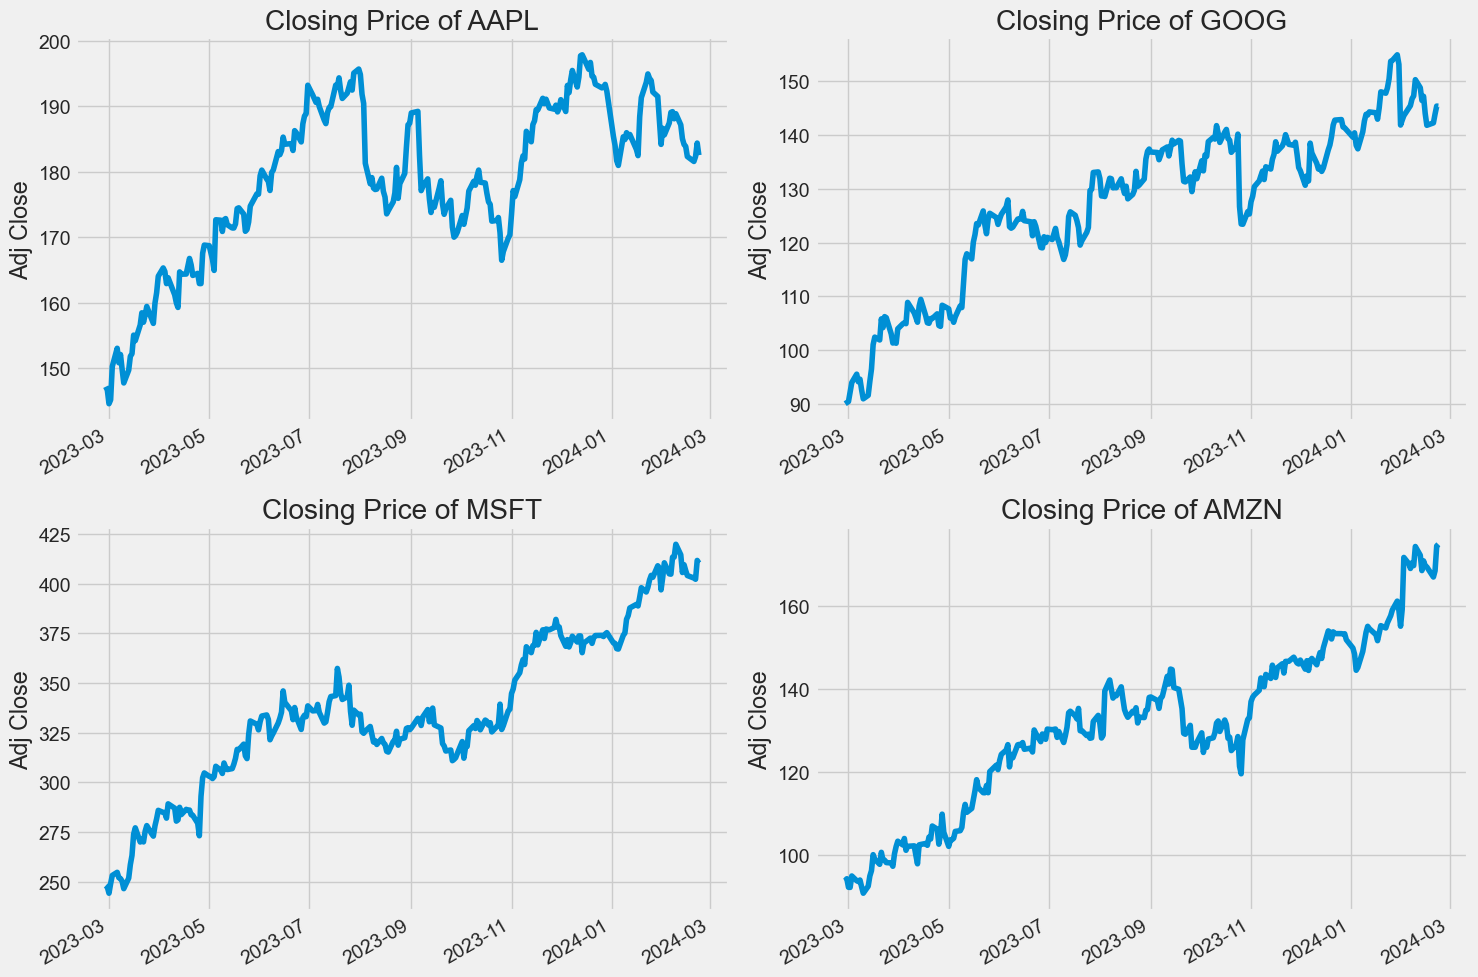

In [18]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i , company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

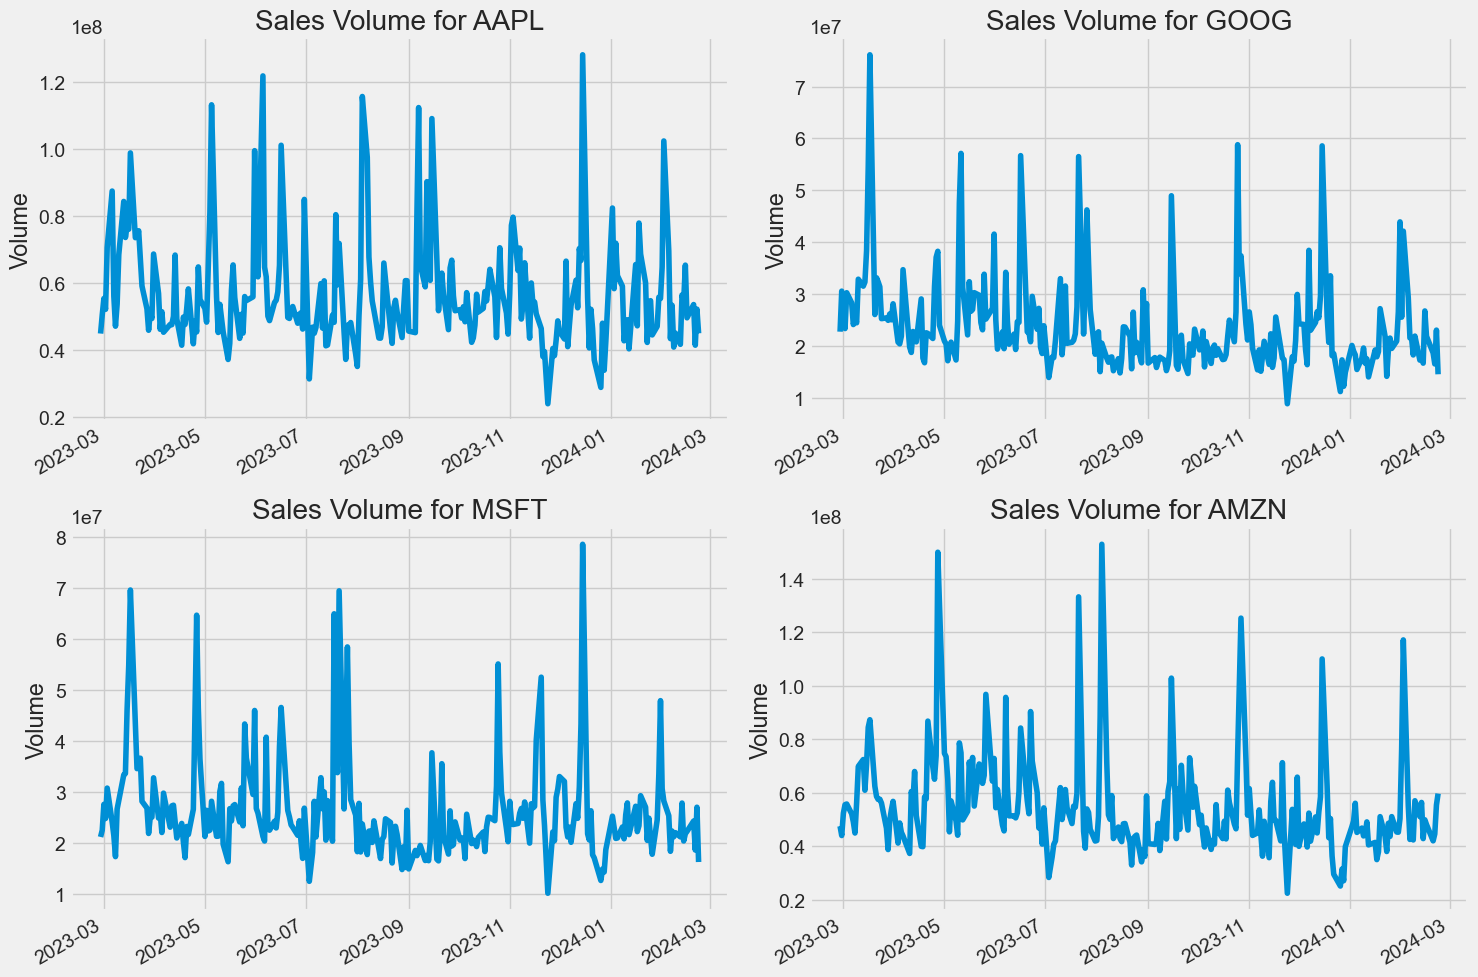

In [19]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Text(0.5, 1.0, 'AMAZON')

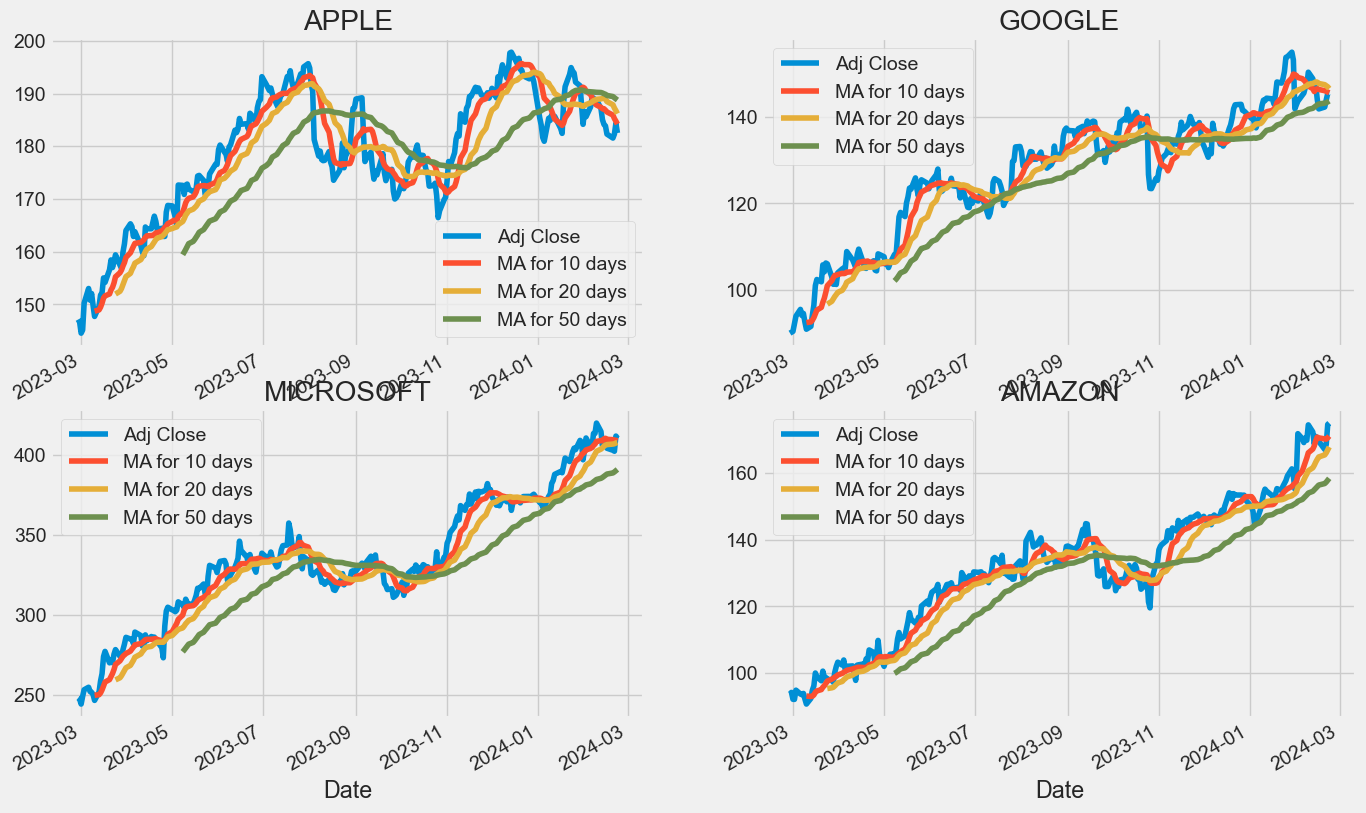

In [25]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')


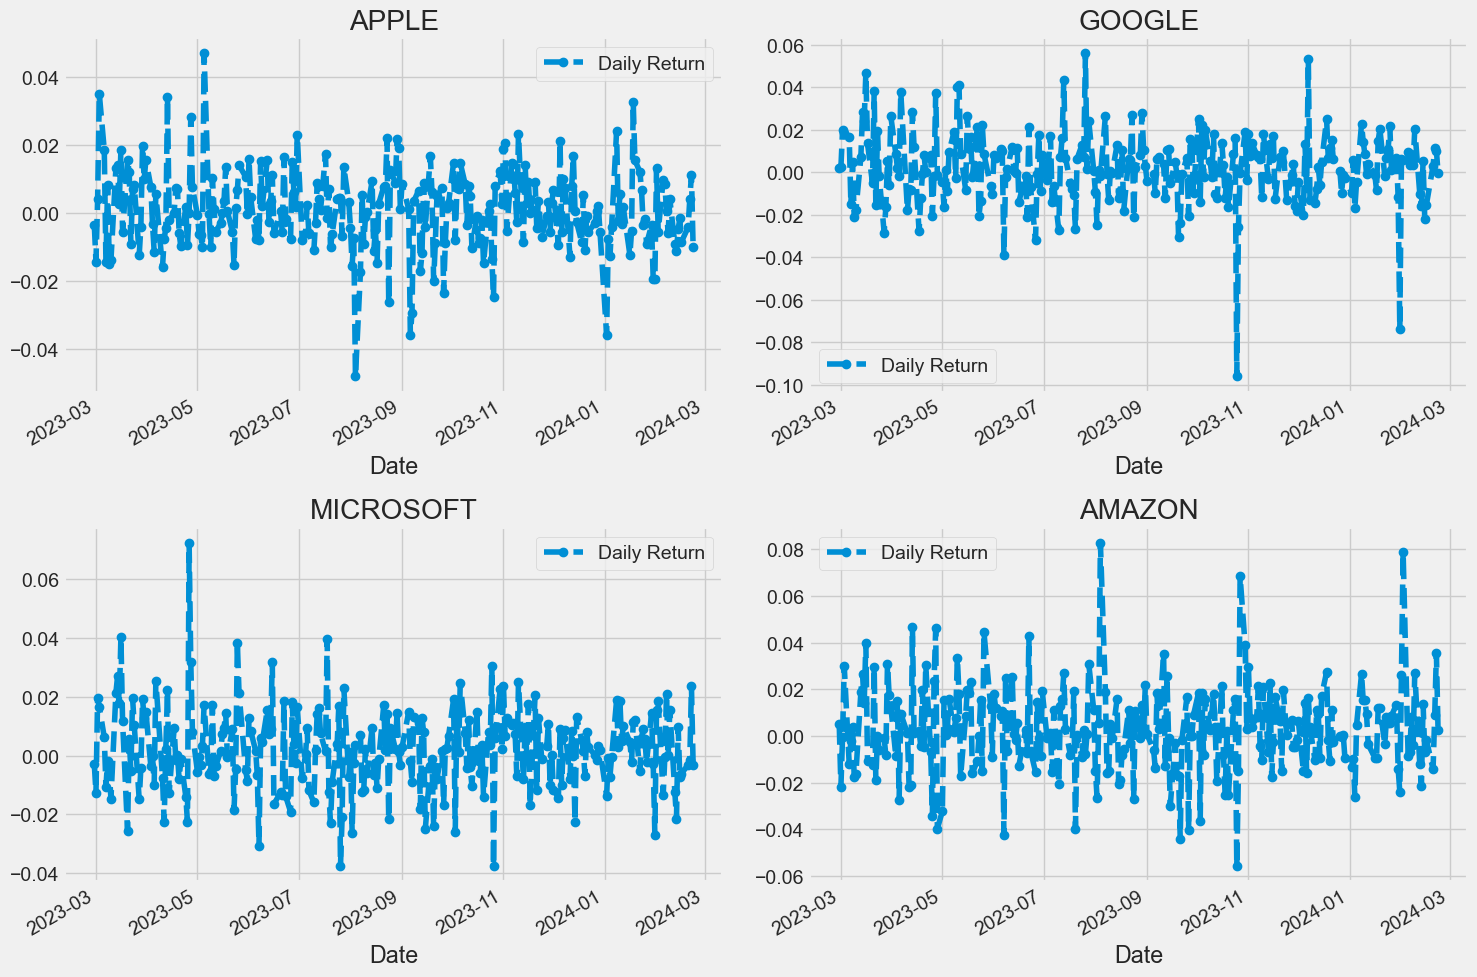

In [26]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

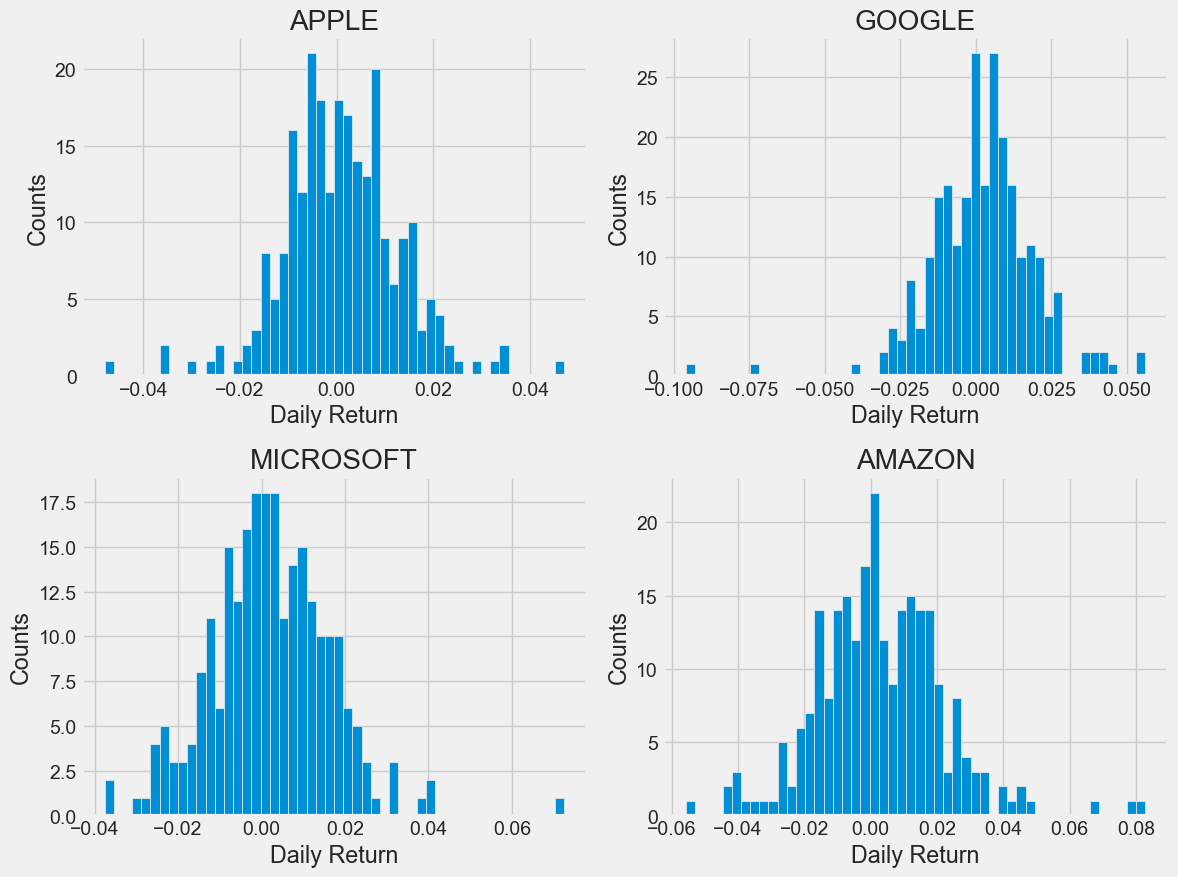

In [27]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [30]:
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500645,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771561,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751302,394024400
...,...,...,...,...,...,...
2024-02-16,183.419998,184.850006,181.669998,182.309998,182.309998,49701400
2024-02-20,181.789993,182.429993,180.000000,181.559998,181.559998,53665600
2024-02-21,181.940002,182.889999,180.660004,182.320007,182.320007,41529700


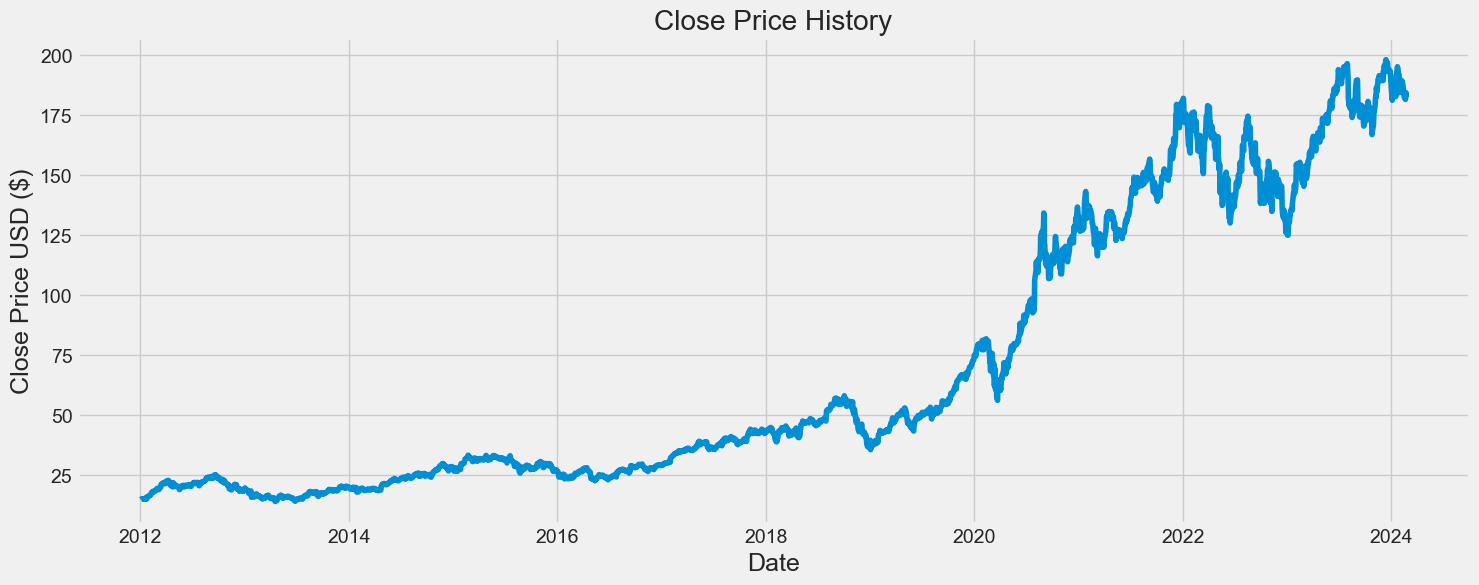

In [31]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [32]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2903

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.91426054],
       [0.92539195],
       [0.91534652]])

In [34]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

2843/2843 [==============================] - 61s 19ms/step - loss: 0.0011


In [36]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 18ms/step


3.742946599803093

array([[[0.82032175],
        [0.82200503],
        [0.81353426],
        ...,
        [0.95970951],
        [0.97762848],
        [0.97621663]],

       [[0.82200503],
        [0.81353426],
        [0.81347991],
        ...,
        [0.97762848],
        [0.97621663],
        [0.98365577]],

       [[0.81353426],
        [0.81347991],
        [0.8387294 ],
        ...,
        [0.97621663],
        [0.98365577],
        [0.97295869]],

       ...,

       [[0.96307607],
        [0.95579991],
        [0.95482247],
        ...,
        [0.92262268],
        [0.91420619],
        [0.9101337 ]],

       [[0.95579991],
        [0.95482247],
        [0.95813476],
        ...,
        [0.91420619],
        [0.9101337 ],
        [0.91426054]],

       [[0.95482247],
        [0.95813476],
        [0.95254188],
        ...,
        [0.9101337 ],
        [0.91426054],
        [0.92539195]]])

C:\Users\Shivam\AppData\Local\Temp\ipykernel_2664\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


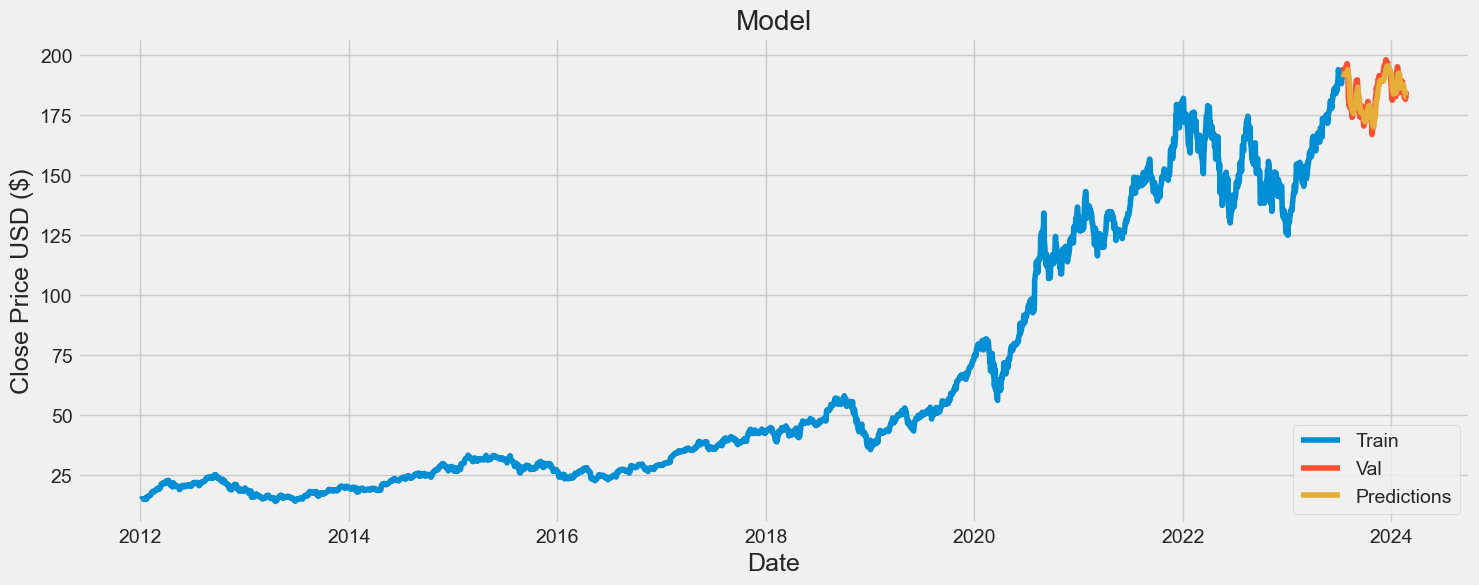

In [37]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
valid

,Close,Predictions
Date,,
2023-07-19,195.100006,190.731934
2023-07-20,193.130005,191.713623
2023-07-21,191.940002,192.172394
2023-07-24,192.750000,192.132217
2023-07-25,193.619995,192.056564
...,...,...
2024-02-16,182.309998,185.200897
2024-02-20,181.559998,184.219254
2024-02-21,182.320007,183.246643
